<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [ ]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


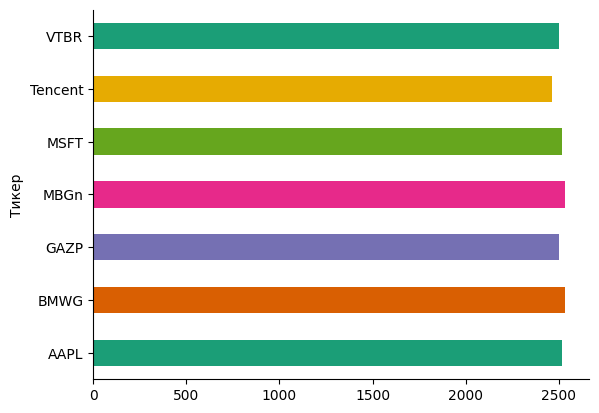

In [ ]:
# @title Тикер

from matplotlib import pyplot as plt
import seaborn as sns
df_stocks.groupby('Тикер').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [ ]:
# your code here
# (♡-_-♡)
df_stocks["Дата"] = df_stocks["Дата"].apply(pd.to_datetime, dayfirst=True)
df_rates["Дата"] = df_rates["Дата"].apply(pd.to_datetime, dayfirst=True)

__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [ ]:
def correct_values(value: str):

    corrected_value = float(value.replace('.', '').replace(',', '.') \
    .replace('B', '').replace('M', '').replace('K', '').replace('%', '')) # your code here

    if 'B' in value:
        corrected_value *= 10**9 # your code here
    elif 'M' in value: # your code here
        corrected_value *= 10**6   # your code here
    elif 'K' in value: # your code here
        corrected_value *= 10**3   # your code here

    return corrected_value

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [ ]:
# your code here
# ヽ(♡‿♡)ノ
df_stocks.loc[:, 'Цена':'Изм. %'] =  \
df_stocks.loc[:, 'Цена':'Изм. %'].map(correct_values, na_action='ignore')

In [ ]:
df_rates.loc[:, 'EUR_RUB':'HKD_RUB'] =  \
df_rates.loc[:, 'EUR_RUB':'HKD_RUB'].map(correct_values, na_action='ignore')

__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [ ]:
df_merged = df_stocks.merge(df_rates, how='left', left_on='Дата', right_on='Дата') # your code here

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.9,194.4,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.5,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.6,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.0,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [ ]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}

for ticker, curr_pair in stocks_currency_dict.items():
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] *= \
      df_merged.loc[df_merged['Тикер'] == ticker, curr_pair].to_numpy()[:, None]
df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.804,17565.984,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.745,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.963,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2,17956.56,17977.72,17753.24,37150000.0,-0.55,AAPL,101.467,92.0,11.791


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [ ]:
# your code here
# (´｡• ᵕ •｡`)
df_merged[df_merged.isna().any(axis=1)].loc[:, ['Дата', 'Тикер']]

,Дата,Тикер
1974,2016-02-27,AAPL
2800,2022-11-21,BMWG
2944,2022-05-03,BMWG
2945,2022-05-02,BMWG
7838,2022-11-21,MBGn
7981,2022-05-04,MBGn
7982,2022-05-03,MBGn
7988,2022-04-25,MBGn
17313,2015-01-17,Tencent


In [ ]:
df_merged = df_merged.dropna(how='any',axis=0)

__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [ ]:
# your code here
# (◕‿◕)♡
len(df_merged["Тикер"].unique())

7

__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [ ]:
# your code here
# ♡ (´｡• ω •｡`) ♡
diff = df_merged["Макс."] - df_merged["Мин."]
max_diff = diff.max()
print(max_diff)
df_merged[diff == max_diff].loc[:, ["Дата", "Тикер"]]

2237.048999999992


,Дата,Тикер
10205,2023-07-18,MSFT


__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [ ]:
# your code here
# (⌒_⌒;)
total_sum = df_merged["Цена"].to_numpy() * df_merged["Объём"].to_numpy()
max_total_sum = total_sum.max()
print(max_total_sum)
df_merged[total_sum == max_total_sum].loc[:, ["Дата", "Тикер"]]

3249826226976.0


,Дата,Тикер
843,2020-08-24,AAPL


__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [ ]:
# your code here
# (＠_＠)
top_5_diff = df_merged[["Дата", 'Изм. %']].groupby(["Дата"]).aggregate(lambda x: np.mean(np.abs(x))).sort_values("Изм. %", ascending=False)[:5]
top_5_diff

,Изм. %
Дата,
2022-02-24,13.081429
2016-02-29,11.840000
2020-03-24,10.795714
2020-03-12,10.615714
2022-02-21,9.128000


__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [ ]:
top_5_diff = top_5_diff # your code here

__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [ ]:
df = pd.pivot_table(df_merged, values='Цена', index=['Дата'], columns=['Тикер']) # your code here

df.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,653.725,3780.51916,NaN,2789.9091,1229.996,418.02048,NaN
2014-01-03,641.424,3788.67372,NaN,2784.88722,1225.412,410.55816,NaN
2014-01-06,645.2703,3756.04441,135.47,2785.23886,1199.8773,411.98177,0.04846
2014-01-07,639.2706,3770.02665,NaN,2815.6752,1206.6274,409.79112,NaN
2014-01-08,643.96557,3803.54355,137.33,2801.87619,1186.40952,416.51786,0.04791


__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__

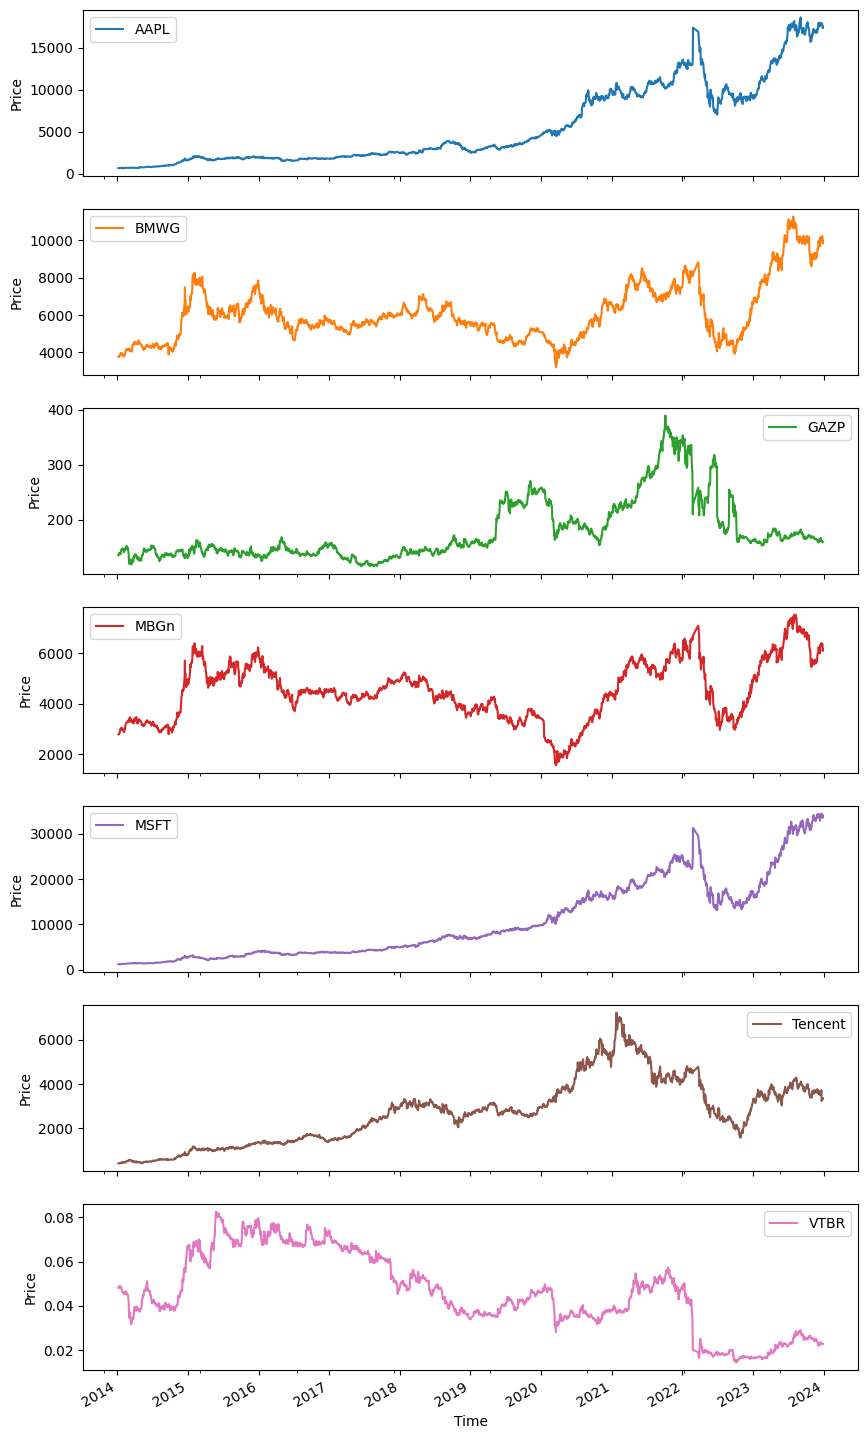

In [ ]:
_ = df.dropna().plot(subplots=True, figsize=(10, 20), xlabel="Time", ylabel="Price")

<ipython-input-20-126b7f5bcea2>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _ = df[["AAPL", "MBGn", "BMWG", "MSFT", "Tencent"]].fillna(0).plot(kind='hist', subplots=True, figsize=(10, 20), bins=150, xlabel="Price", ylabel="Count")
<ipython-input-20-126b7f5bcea2>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _ = df[["VTBR"]].fillna(0).plot(kind='hist', subplots=True, figsize=(10, 3), bins=150, xlabel="Price", ylabel="Count")
<ipython-input-20-126b7f5bcea2>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated a

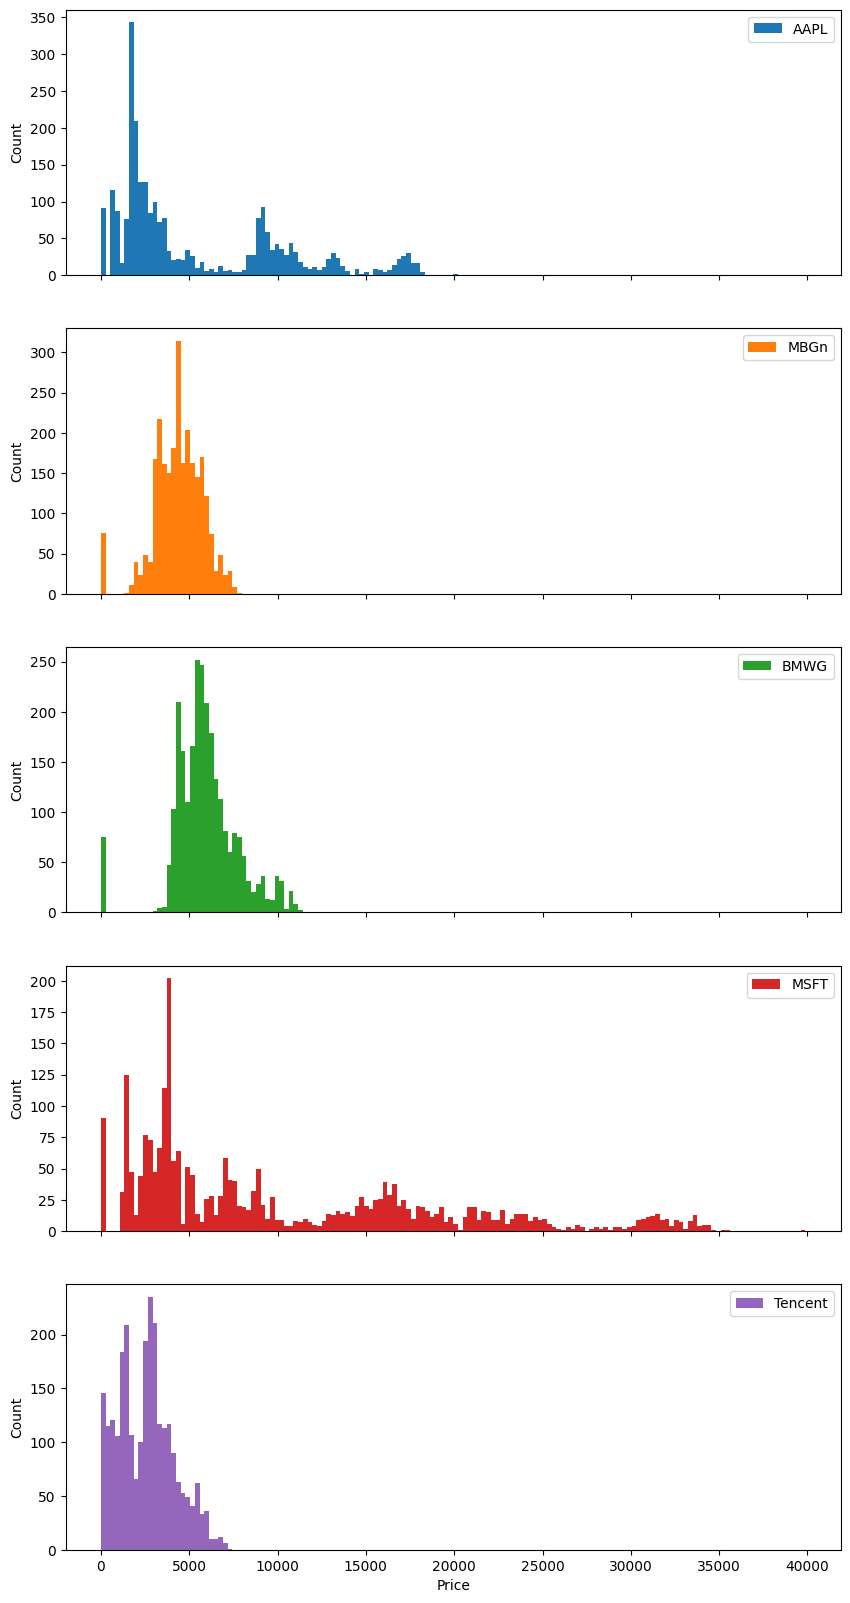

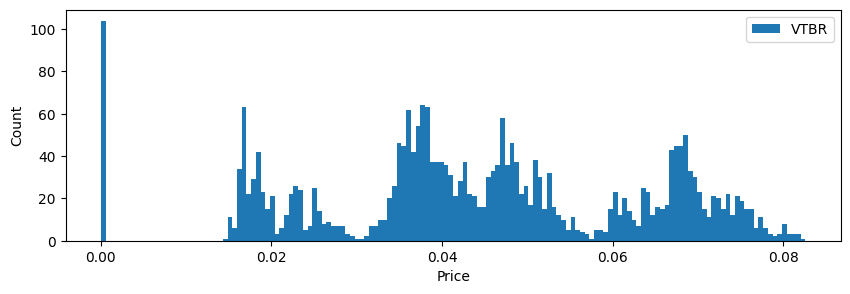

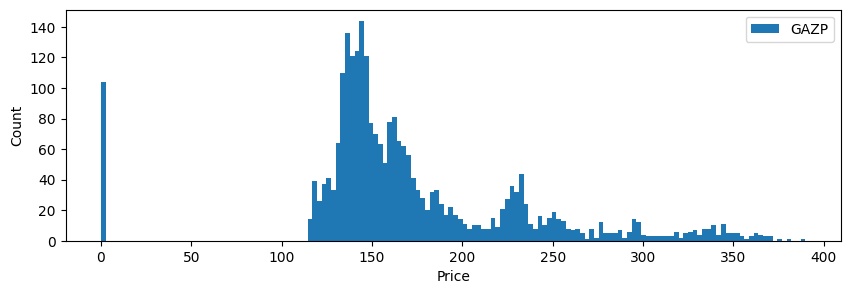

In [ ]:
# your code here
# (￢_￢)
_ = df[["AAPL", "MBGn", "BMWG", "MSFT", "Tencent"]].fillna(0).plot(kind='hist', subplots=True, figsize=(10, 20), bins=150, xlabel="Price", ylabel="Count")
_ = df[["VTBR"]].fillna(0).plot(kind='hist', subplots=True, figsize=(10, 3), bins=150, xlabel="Price", ylabel="Count")
_ = df[["GAZP"]].fillna(0).plot(kind='hist', subplots=True, figsize=(10, 3), bins=150, xlabel="Price", ylabel="Count")

Видно, что даже на глаз распределение не является нормальным, почти у всех слишком тяжёлые правые хвосты.

Видно, что в самом начале 2022 был кризис, особенно это заменто на воне до этго постоянно монотонно увеличивающихся акция компаний, таких, как Microsoft.
Пожалуй, за исключением VTBR, который стабильно лет 5 не может выйти на лучшие времена, и просадку в GAZP, рынок в основном растёт.

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [ ]:
df_pct_change = 100 * df.pct_change(fill_method="pad")[1:] # your code here
df_pct_change

<ipython-input-21-b66691e03e90>:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct_change = 100 * df.pct_change(fill_method="pad")[1:] # your code here
<ipython-input-21-b66691e03e90>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pct_change = 100 * df.pct_change(fill_method="pad")[1:] # your code here


Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-03,-1.881678,0.215699,NaN,-0.180002,-0.372684,-1.785157,NaN
2014-01-06,0.599650,-0.861233,NaN,0.012627,-2.083764,0.346750,NaN
2014-01-07,-0.929796,0.372260,0.000000,1.092773,0.562566,-0.531735,0.000000
2014-01-08,0.734426,0.889036,1.372998,-0.490078,-1.675569,1.641505,-1.134957
2014-01-09,-1.180885,-0.359101,0.983034,0.245149,-0.535366,-1.603194,0.438322
...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.616941,0.000000,0.000000,0.000000,0.957563
2023-12-26,-0.652606,0.000000,-0.055869,0.000000,-0.348287,0.000000,-0.150895
2023-12-27,-0.373906,0.068282,-0.708075,0.020212,-0.582292,3.485307,-1.230570


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__ ваш текст

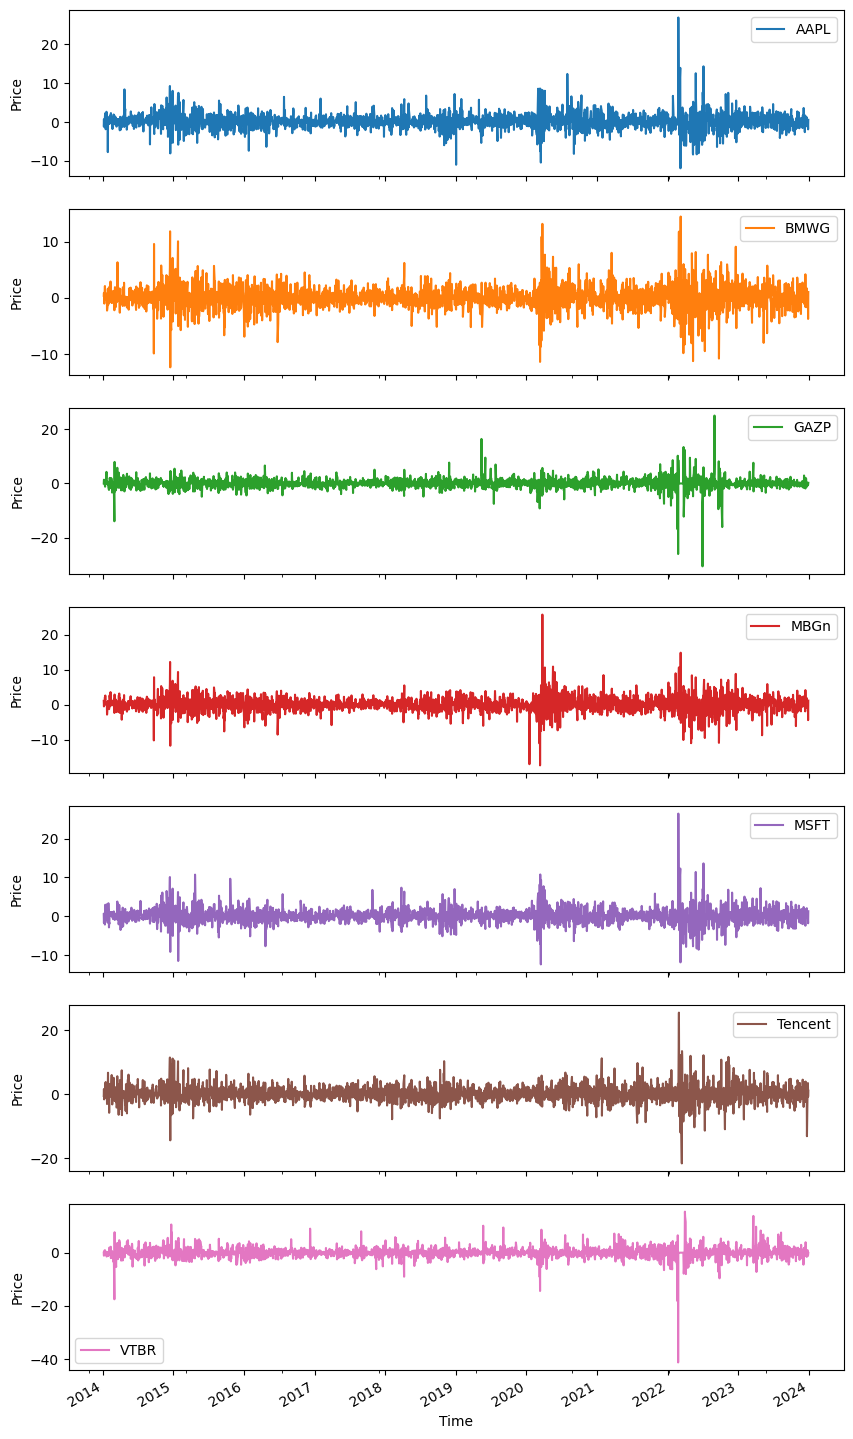

In [ ]:
# your code here
# (⊙_⊙)
_ = df_pct_change.dropna().plot(subplots=True, figsize=(10, 20), xlabel="Time", ylabel="Price")

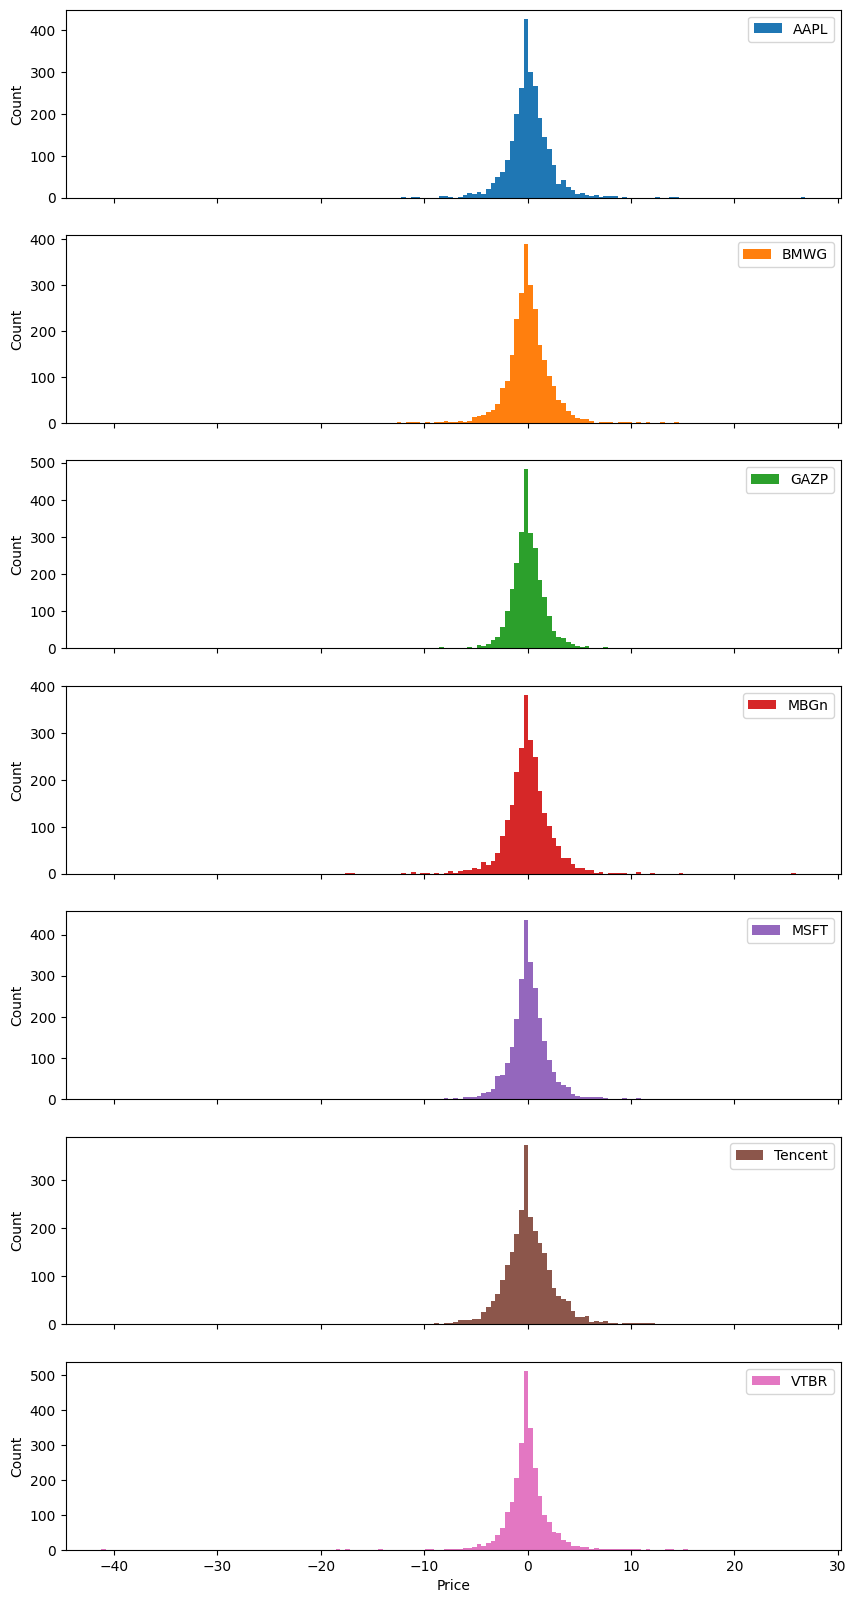

In [ ]:
_ = df_pct_change.dropna().plot(kind='hist', subplots=True, figsize=(10, 20), bins=150, xlabel="Price", ylabel="Count")

Графики имеют очень похожие распределения. Посмотрим на фиттинг под нормальные данные для, скажем, BMWG

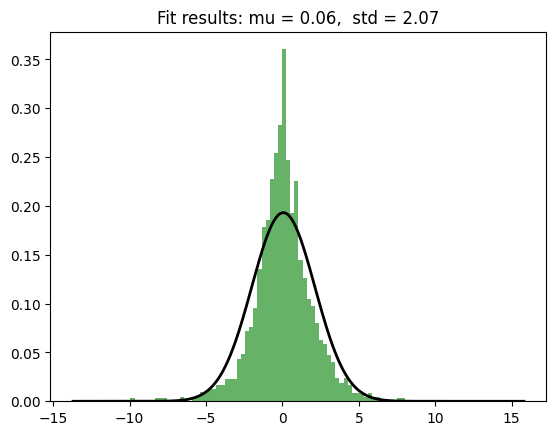

In [ ]:
# https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
mu, std = sts.norm.fit(df_pct_change["BMWG"].dropna())

# Plot the histogram.
plt.hist(df_pct_change["BMWG"].dropna(), bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = sts.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Видно, что данные слишком "уже" нормальных

Text(0, 0.5, 'Доходность')

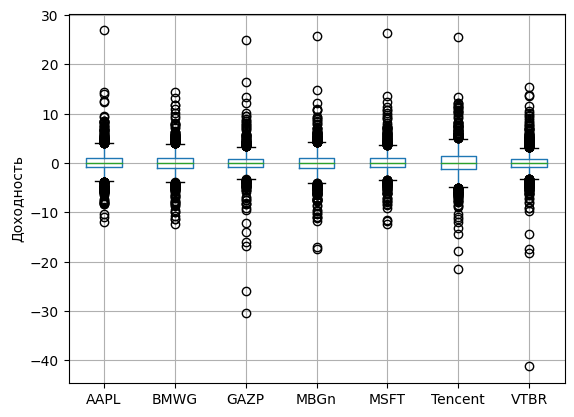

In [ ]:
df_pct_change.dropna().boxplot()
plt.ylabel("Доходность")

Судя по BoxPlot данные не лишком нормальные, присутствует "много" выбросов в абсолютном смысле, однако это ничег не говорит о доле выбросов, поэтому строго сказать нельзя. Хотя по графику динамики данные очень похожи на нормальные. Имеет смысл применить критерий Шапиро-Уилка

In [ ]:
for column in df_pct_change.columns:
  print(sts.shapiro(df_pct_change[column].dropna()))

ShapiroResult(statistic=0.89866042137146, pvalue=1.8440922437295802e-38)
ShapiroResult(statistic=0.9324390888214111, pvalue=8.06275615990838e-33)
ShapiroResult(statistic=0.7700153589248657, pvalue=0.0)
ShapiroResult(statistic=0.9005799293518066, pvalue=3.486154803702366e-38)
ShapiroResult(statistic=0.8872599601745605, pvalue=5.0690150258946635e-40)
ShapiroResult(statistic=0.9194812774658203, pvalue=3.3331656022372596e-35)
ShapiroResult(statistic=0.7953907251358032, pvalue=0.0)


Везде слишком малое p-value, принять гипотезу о нормальности мы не можем.

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [ ]:
# your code here
# =^･ｪ･^=
df_mean_dox = pd.DataFrame(np.abs(df_pct_change).mean(axis=1), columns=["Avg"])
df_mean_dox

,Avg
Дата,
2014-01-03,0.887044
2014-01-06,0.780805
2014-01-07,0.498447
2014-01-08,1.134081
2014-01-09,0.763579
...,...
2023-12-25,0.224929
2023-12-26,0.172522
2023-12-27,0.924092


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [ ]:
top_5_diff['Изм. (RUB) %'] = df_mean_dox.loc[top_5_diff.index.format()] # your code here

top_5_diff

<ipython-input-28-264b9af76a4c>:1: FutureWarning: DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  top_5_diff['Изм. (RUB) %'] = df_mean_dox.loc[top_5_diff.index.format()] # your code here


,Изм. %,Изм. (RUB) %
Дата,,
2022-02-24,13.081429,12.677837
2016-02-29,11.840000,1.631587
2020-03-24,10.795714,9.703503
2020-03-12,10.615714,9.195150
2022-02-21,9.128000,5.438385


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__
Уменьшение говорит о том, что рублю не достаточно числа операций в нём, чтобы выбить такие же макимумы по изменениям в течении дня, как валюте. Имеется связь с тикерами GAZP: чем больше отклонение от нуля в дату у GAZP, тем меньше изменение в рублях относительно изменения, не переведённого в рубли.


## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
w = 0.01 * np.arange(0, 1 / 0.01) # your code her

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [ ]:
func = lambda st: ((1 + df_pct_change[st].mean() / 100)**252 - 1)
r1 = func("AAPL") # your code here
r2 = func("Tencent") # your code here

In [ ]:
r1, r2

(0.4498400845173225, 0.3295283131928597)

__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [ ]:
func = lambda st: np.sqrt(252) * df_pct_change[st].std() / 100
sd1 = func("AAPL") # your code here
sd2 = func("Tencent") # your code here

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [ ]:
rho = np.corrcoef(df_pct_change["AAPL"], df_pct_change["Tencent"])[1, 0]  # your code here

Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [ ]:
r_p2 = w * r1 +(1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

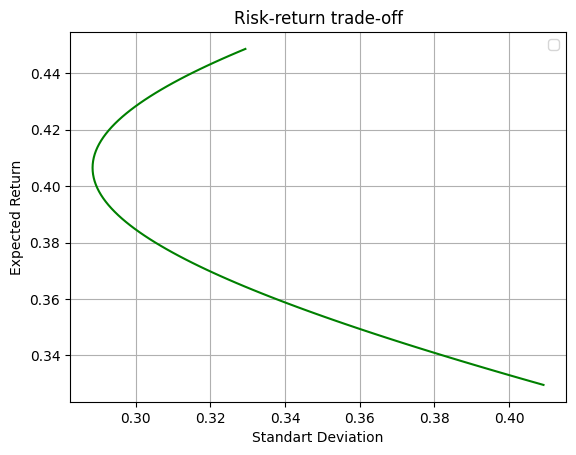

In [ ]:
# your code here
# ┌(ಠ_ಠ)┘
plt.xlabel("Standart Deviation")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.title("Risk-return trade-off")
plt.plot(sd_p2, r_p2, 'g')

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [ ]:
df_r = pd.DataFrame(np.array([w, sd_p2, r_p2]).T, columns=['Вес', 'Риск', 'Доходность']) # your code here

In [ ]:
df_r

,Вес,Риск,Доходность
0,0.00,0.409207,0.329528
1,0.01,0.406000,0.330731
2,0.02,0.402819,0.331935
3,0.03,0.399664,0.333138
4,0.04,0.396536,0.334341
...,...,...,...
95,0.95,0.320974,0.443824
96,0.96,0.322992,0.445028
97,0.97,0.325060,0.446231
98,0.98,0.327178,0.447434


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [ ]:
min_sd = df_r["Риск"].min() # your code here
min_sd_p = df_r[df_r["Риск"] == min_sd]# your code here

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [ ]:
df_eff_p = df_r[df_r['Доходность'] > min_sd_p['Доходность'].to_numpy()[0]] # your code here

__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

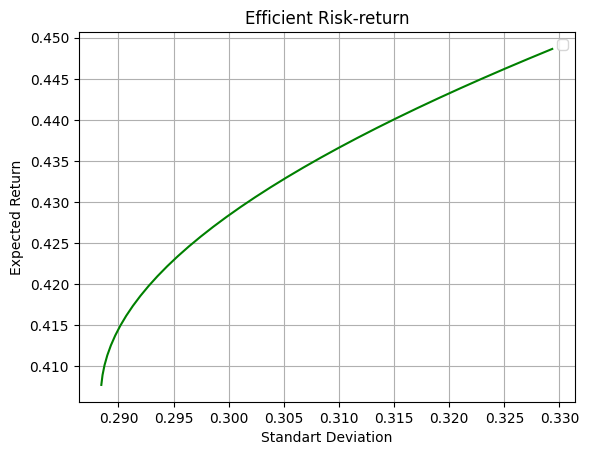

In [ ]:
# your code here
# [✖‿✖]
plt.xlabel("Standart Deviation")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.title("Efficient Risk-return")
plt.plot(df_eff_p["Риск"], df_eff_p["Доходность"], 'g')

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [ ]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [ ]:
df_r['Sharp'] = (df_r["Доходность"] - r_f) / df_r["Риск"] # your code here

__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [ ]:
max_sharp = df_r['Sharp'].max() # your code here
max_sharp_p = df_r[df_r['Sharp'] == max_sharp] # your code here

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [ ]:
sigma = np.array([min_sd, max_sharp_p["Риск"].to_numpy()[0]]) # your code here

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [ ]:
r = max_sharp * sigma + r_f # your code here

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

Text(0.5, 1.0, 'Optimization solution')

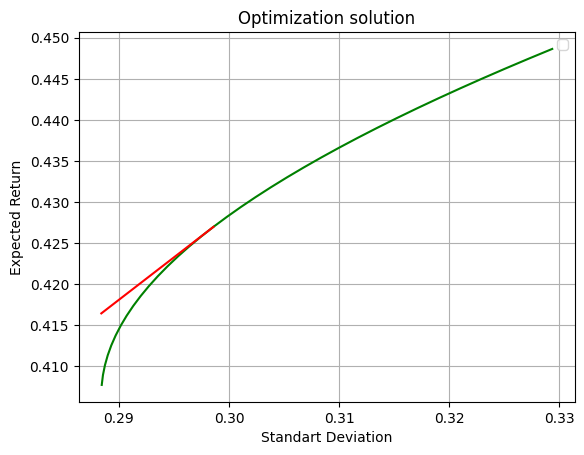

In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]
plt.plot(df_eff_p["Риск"], df_eff_p["Доходность"], 'g')
plt.plot(sigma, r, 'r')
plt.xlabel("Standart Deviation")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.title("Optimization solution")

Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

In [ ]:
max_sharp_p

,Вес,Риск,Доходность,Sharp
81,0.81,0.298598,0.426981,1.034772


**Ответ:** Данное число в основном имеет значение относительное, то есть, к примеру в нашем случае, видно, что риск мы увеличили немного, а вот доходность - чуть больше (по сравнению с портфелем с минимальным риском). То есть можно сказать, что данное число говорит о том, что этот портфель привлекательный, потому что совсем небольшая прибавка в риске компенсируется относительно большим скачком доходности. При сравнении двух активов с одинаковым ожидаемым доходом, вложение в актив с более высоким коэффициентом Шарпа будет менее рискованным.
Также, понятно, что всегда можно вложиться безрисково в банк, поэтому, поэтому надо всегда отталкиваться от доходности такой безрисковой стратегии и вычитать безрисковую процентную ставку.
Что же касается данного значения, чуть большего единицы, при нём инвестор получает дополнительную доходность за риск, который он принимает (относительно безрисковой стратегии), равную стандартному отклонению доходности.

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.